In [5]:
df = pd.read_csv('./data/winemag-data-130k-v2.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
cols = ['title', 'country', 'description', 'points','price', 'province', 'region_1', 'region_2', 'variety', 'winery',
        'taster_name','taster_twitter_handle', 'designation']
df = df[cols]
df

,title,country,description,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,designation
0,Nicosia 2013 Vulkà Bianco (Etna),Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,NaN,White Blend,Nicosia,Kerin O’Keefe,@kerinokeefe,Vulkà Bianco
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,NaN,Portuguese Red,Quinta dos Avidagos,Roger Voss,@vossroger,Avidagos
2,Rainstorm 2013 Pinot Gris (Willamette Valley),US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm,Paul Gregutt,@paulgwine,NaN
3,St. Julian 2013 Reserve Late Harvest Riesling ...,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,NaN,Riesling,St. Julian,Alexander Peartree,NaN,Reserve Late Harvest
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks,Paul Gregutt,@paulgwine,Vintner's Reserve Wild Child Block
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,NaN,NaN,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Anna Lee C. Iijima,NaN,Brauneberger Juffer-Sonnenuhr Spätlese
129967,Citation 2004 Pinot Noir (Oregon),US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,Paul Gregutt,@paulgwine,NaN
129968,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Alsace,NaN,Gewürztraminer,Domaine Gresser,Roger Voss,@vossroger,Kritt
129969,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Alsace,NaN,Pinot Gris,Domaine Marcel Deiss,Roger Voss,@vossroger,NaN


In [6]:
df_description = df['description']

In [15]:
data = []

for i in range(len(df_description)):
    x = df_description[i]
    data.append(x)
data

["Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",
 "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.",
 'Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.',
 'Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.',
 "Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy count

In [16]:
from wordcloud import WordCloud, STOPWORDS


stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [17]:
wc = WordCloud(background_color="white", max_words=2000, stopwords=stopwords)
wc = wc.generate(text)
wc.words_

{'dried': 1.0,
 'Aromas': 0.5,
 'include': 0.5,
 'tropical': 0.5,
 'fruit': 0.5,
 'broom': 0.5,
 'brimstone': 0.5,
 'herb': 0.5,
 'The': 0.5,
 'palate': 0.5,
 'overly': 0.5,
 'expressive': 0.5,
 'offering': 0.5,
 'unripened': 0.5,
 'apple': 0.5,
 'citrus': 0.5,
 'sage': 0.5,
 'alongside': 0.5,
 'brisk': 0.5,
 'acidity': 0.5}

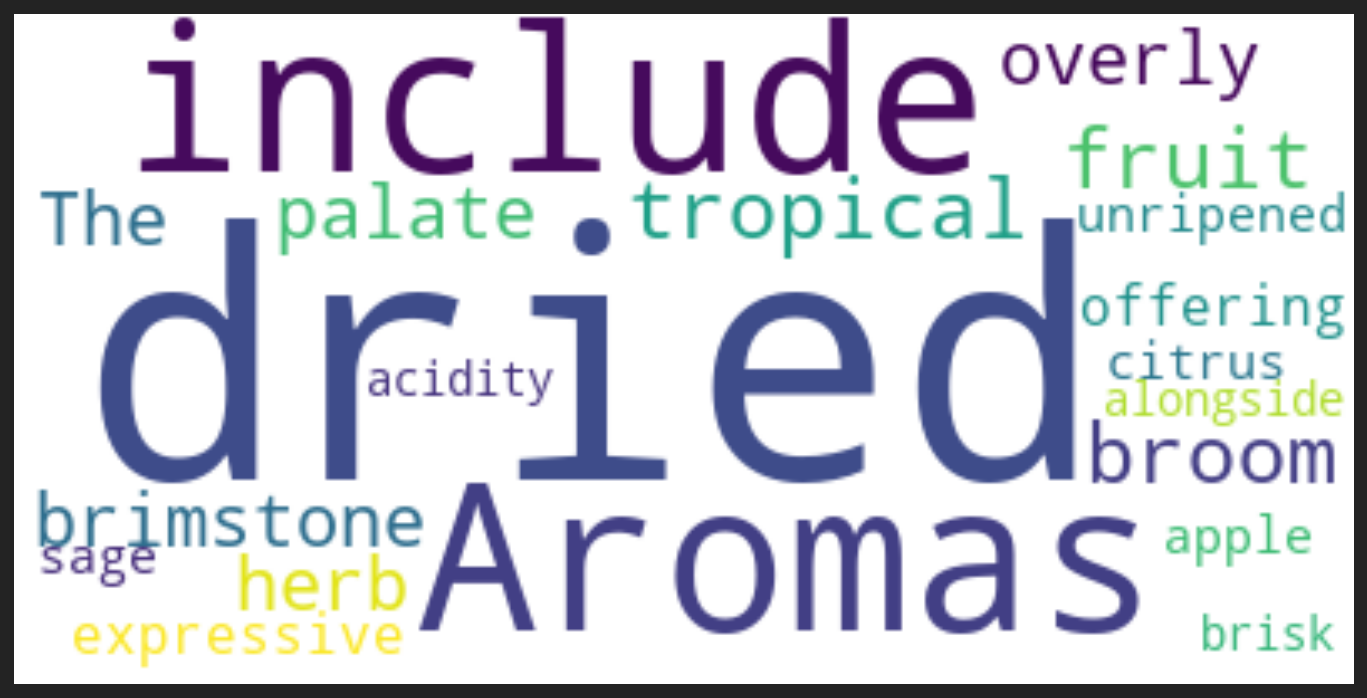

In [18]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()